<a href="https://colab.research.google.com/github/changsin/ML/blob/main/MIU/04.linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression



In [ ]:
!git clone https://github.com/changsin/ML

Cloning into 'ML'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


# Sample dataset:
 [sklearn diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html)

## X column attributes:
1. age age in years
2. sex
3. bmi body mass index
4. bp average blood pressure
5. s1 tc, total serum cholesterol
6. s2 ldl, low-density lipoproteins
7. s3 hdl, high-density lipoproteins
8. s4 tch, total cholesterol / HDL
9. s5 ltg, possibly log of serum triglycerides level
10. s6 glu, blood sugar level

(mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

## y target value:
 quantitative measure of disease progression one year after baseline


In [1]:
from sklearn import datasets

X, y = datasets.load_diabetes(return_X_y=True)
X.shape

(442, 10)

No handles with labels found to put in legend.


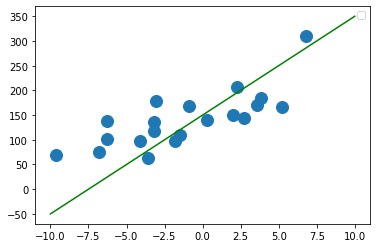

In [46]:
import matplotlib.pyplot as plt

def plot_data(X, y, limit=20):
  fig, ax = plt.subplots()
  ax.plot(X[:limit, 8]*100, y[:limit], marker='o', linestyle='', ms=12)
  # ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')

  plt.legend()

  return ax

ax = plot_data(X, y)

x_line = np.linspace(-10, 10, 100)
y_line = 20*x_line + 150

ax.plot(x_line, y_line, 'g', label='y=wx+b')